# Libraries

In [3]:
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, LSTM, Bidirectional
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from tqdm import tqdm_notebook
from keras.datasets import mnist
from sklearn.utils import shuffle
from keras.utils import np_utils
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2


### Reading data from prepared dataset 

In [4]:
data = pd.read_csv('C:/Users/madha/Downloads/Last Stage/dataset.csv').astype('float32')

In [5]:
data

,0,255,255.1,255.2,255.3,255.4,255.5,255.6,255.7,255.8,...,255.641,255.642,255.643,255.644,255.645,255.646,255.647,255.648,255.649,255.650
0,0.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
1,0.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,0.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,0.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
4,0.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,254.0,252.0,252.0,252.0,254.0,255.0,255.0,255.0,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137204,134.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,252.0,247.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
137205,134.0,255.0,255.0,255.0,255.0,255.0,254.0,254.0,253.0,252.0,...,204.0,179.0,167.0,170.0,191.0,214.0,234.0,247.0,253.0,255.0
137206,134.0,233.0,236.0,242.0,249.0,252.0,254.0,255.0,255.0,255.0,...,240.0,239.0,240.0,242.0,246.0,249.0,252.0,254.0,255.0,255.0
137207,134.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,249.0,252.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


# Data Splitting 

### Data is split into images and respective labels

In [6]:
X = data.drop('0',axis = 1)
y = data['0']

In [7]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.14285)


### Reshaping data to form an image 

In [8]:
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

In [9]:
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (117608, 28, 28)
Test data shape:  (19601, 28, 28)


### Creating a dictionary to map integer values to specific characters 

In [10]:
# Dictionary for getting characters from index values...
symdict =  {0:'0',
                    1:'1',
                     2:'2',
                     3:'3',
                     4:'4',
                     5:'5',
                     6:'6',
                     7:'7',
                     8:'8',
                     9:'9',
                     10:'+',
                     11:'-',
                     12:'x',
                     13:'÷',
                     14:'(',
                     15:')',
                     16:'[',
                     17:']',
                     18:'{',
                     19:'}',
                     20:'a',
                     21:'b',
                     22:'c',
                     23:'d', 
                     24:'e',
                     25:'f',
                     26:'g',
                     27:'h',
                     28:'i',
                     29:'j',
                     30:'k',
                     31:'l',
                     32:'m',
                     33:'n',
                     34:'o',
                     35:'p',
                     36:'q',
                     37:'r',
                     38:'s',
                     39:'t',
                     40:'u',
                     41:'v',
                     42:'w',
                     43:'x', 
                     44:'y',
                     45:'z',
                     46:'A',
                     47:'B',
                     48:'C', 
                     49:'D',
                     50:'E',
                     51:'F',
                     52:'G',
                     53:'H',
                     54:'I',
                     55:'J',
                     56:'K',
                     57:'L',
                     58:'M',
                     59:'N',
                     60:'O',
                     61:'P',
                     62:'Q',
                     63:'R',
                     64:'S',
                     65:'T',
                     66:'U',
                     67:'V',
                     68:'W',
                     69:'X',
                     70:'Y',
                     71:'Z',
                     72:'=',
                     73:'≠', 
                     74:'>',
                     75:'<',
                     76:'≥',
                     77:'≤',
                     78:'&',
                     79:'`',
                     80:':',
                     81:',',
                     82:'.',
                     83:'$',
                     84:'!',
                     85:'∃',
                     86:'@',
                     87:'∀',
                     88:'#',
                     89:'in',
                     90:'∞',
                     91:'∫',
                     92:'lim',
                     93:'log', 
                     94:'%',
                     95:'±',
                     96:'π',
                     97:'′',
                     98:'?',
                     99:'""',
                     100:'^',
                     101:'→',
                     102:'/',
                     103:'√',
                     104:'*',
                     105:'∑',
                     106:'~',
                     107:'_',
                     108:'sin',
                     109:'cos',
                     110:'tan',
                     111:'𝛂',
                     112:'β',
                     113:'𝛾', 
                     114:'δ',
                     115:'ε',
                     116:'ζ',
                     117:'𝜂',
                     118:'θ',
                     119:'λ', 
                     120:'μ',
                     121:'𝜈',
                     122:'π',
                     123:'ρ',
                     124:'σ',
                     125:'𝛕',
                     126:'Φ',
                     127:'ψ',
                     128:'ω',
                     129:'Ꭓ',
                     130:'ɩ',
                     131:'Κ',
                     132:'Ο',
                     133:'Ʊ',
                     134:'ξ'
            }

### Visualizing character count in the prepared dataset 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 120514 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 120574 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 120578 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 120584 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 120533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 42931 missing f

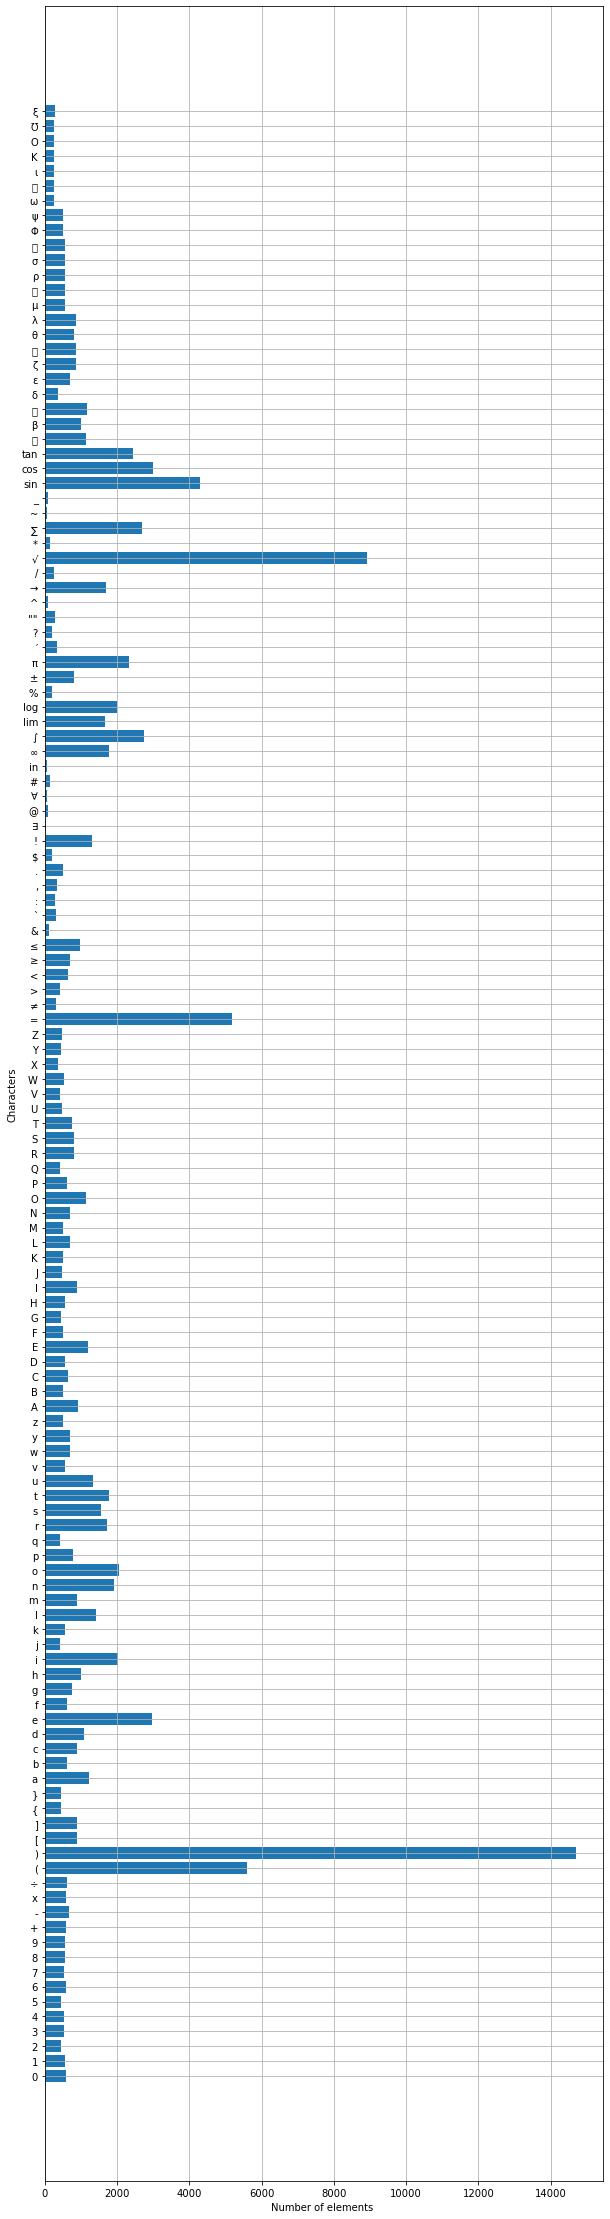

In [11]:
train_yint = np.int0(y)
count = np.zeros(135, dtype='int')
for i in train_yint:
    count[i] +=1

characters = []
for i in symdict.values():
    characters.append(i)

fig, ax = plt.subplots(1,1, figsize=(10,40))
ax.barh(characters, count)

plt.xlabel("Number of elements ")
plt.ylabel("Characters")
plt.grid()
plt.show()

# Data Shuffling 

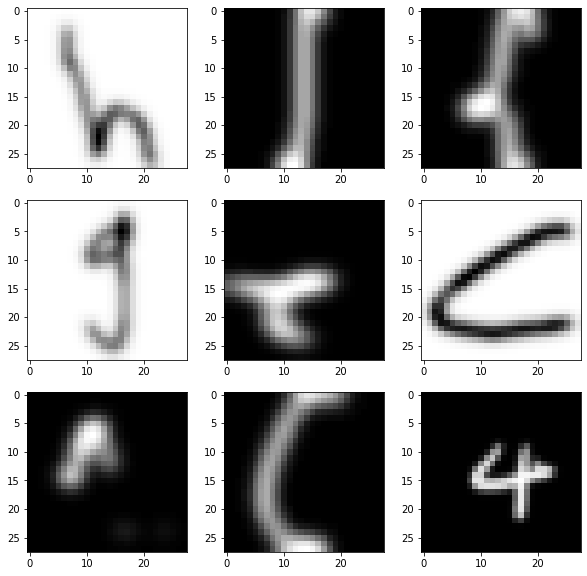

In [12]:
shuff = shuffle(train_x[:100])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

# Reshaping Data

In [13]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (117608, 28, 28, 1)
New shape of train data:  (19601, 28, 28, 1)


In [14]:
trainr_y = to_categorical(train_y, num_classes = 135, dtype='int')
print("New shape of train labels: ", trainr_y.shape)

testr_y = to_categorical(test_y, num_classes = 135, dtype='int')
print("New shape of test labels: ", testr_y.shape)

New shape of train labels:  (117608, 135)
New shape of test labels:  (19601, 135)


# CNN Model

In [17]:
model = Sequential()
############################

#First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))

#First Max Pooling
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
################################

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
##################################################

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
###############################
model.add(tf.keras.Input(shape=( 2, 2, 28), batch_size=64)),
model.add(Bidirectional(LSTM(128, return_sequences=False)))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(135,activation ="softmax"))



ValueError: Input 0 of layer "bidirectional_2" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, 2, 2, 128)

# Model Compilation

In [22]:
model.compile(optimizer = Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.14285, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')


# Model Fitting

In [23]:
history = model.fit(train_X, trainr_y, epochs=20, callbacks=[reduce_lr, early_stop],  validation_data = (test_X,testr_y))

Epoch 1/20
3676/3676 [==============================] - 69s 19ms/step - loss: 1.2178 - accuracy: 0.6620 - val_loss: 0.6933 - val_accuracy: 0.7878 - lr: 0.0010
Epoch 2/20
3676/3676 [==============================] - 75s 20ms/step - loss: 0.5784 - accuracy: 0.8178 - val_loss: 0.5403 - val_accuracy: 0.8280 - lr: 0.0010
Epoch 3/20
3676/3676 [==============================] - 80s 22ms/step - loss: 0.4636 - accuracy: 0.8499 - val_loss: 0.4507 - val_accuracy: 0.8590 - lr: 0.0010
Epoch 4/20
3676/3676 [==============================] - 75s 20ms/step - loss: 0.4057 - accuracy: 0.8668 - val_loss: 0.4659 - val_accuracy: 0.8559 - lr: 0.0010
Epoch 5/20
3676/3676 [==============================] - 80s 22ms/step - loss: 0.2510 - accuracy: 0.9133 - val_loss: 0.3309 - val_accuracy: 0.8966 - lr: 1.4285e-04
Epoch 6/20
3676/3676 [==============================] - 78s 21ms/step - loss: 0.2136 - accuracy: 0.9247 - val_loss: 0.3217 - val_accuracy: 0.9012 - lr: 1.4285e-04
Epoch 7/20
3676/3676 [================

# Model Summary

In [24]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 2, 2, 128)       

In [25]:
model.save(r'model02.h5')

# Metrics

In [26]:
print("Validation accuracy :", history.history['val_accuracy'])
print("Training accuracy :", history.history['accuracy'])
print("Validation loss :", history.history['val_loss'])
print("Training loss :", history.history['loss'])

Validation accuracy : [0.7877659201622009, 0.8280189633369446, 0.8590378165245056, 0.8559257388114929, 0.8966379165649414, 0.9011785387992859, 0.900770366191864, 0.9056170582771301, 0.9056680798530579, 0.9054639935493469]
Training accuracy : [0.6619532704353333, 0.8178099989891052, 0.8499422073364258, 0.8668117523193359, 0.9133477210998535, 0.9247329831123352, 0.9307615160942078, 0.9399615526199341, 0.9436348080635071, 0.9466788172721863]
Validation loss : [0.6932699680328369, 0.540341854095459, 0.450736939907074, 0.4658990800380707, 0.33090144395828247, 0.321672648191452, 0.3224754333496094, 0.3201638460159302, 0.32471010088920593, 0.3327959477901459]
Training loss : [1.2178434133529663, 0.5783660411834717, 0.46358829736709595, 0.4056549668312073, 0.2510078549385071, 0.2136390060186386, 0.19336281716823578, 0.17004947364330292, 0.15873289108276367, 0.14895613491535187]


In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

<function matplotlib.pyplot.show(close=None, block=None)>

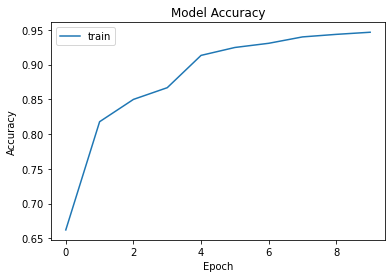

In [28]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc = 'upper left')
plt.show

# Predictions for testing data

In [29]:
pred = model.predict(test_X[:9])
print(test_X.shape)

(19601, 28, 28, 1)


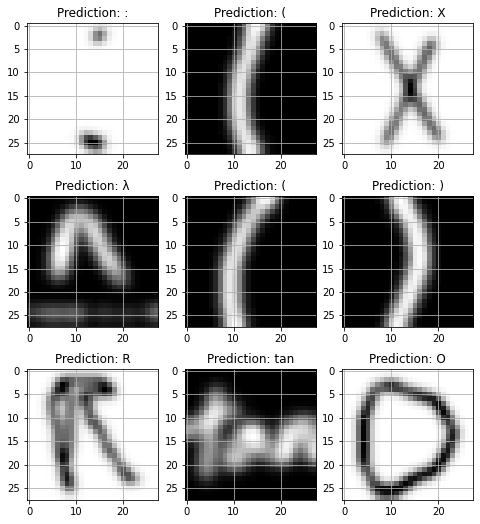

In [30]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    pred = symdict[np.argmax(testr_y[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

# Predictions for provided image

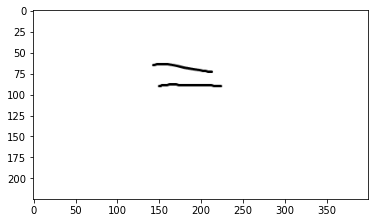

Prediction:  :


In [34]:
img = cv2.imread(r'C:\Users\madha\Downloads\Last Stage\test.png')
img_copy = img.copy()
plt.figure()
plt.imshow(img_copy) 
plt.show()


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))


img_pred = symdict[np.argmax(model.predict(img_final))]

print("Prediction: ", img_pred)


